In [32]:
import json
import csv

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import pandas as pd

import itertools
import matplotlib.pyplot as plt

In [2]:
# Reading in datasets/book1.csv
book1 = pd.read_csv('book1.csv')

In [151]:
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [ ]:
# csvpath = 'book1.csv'
# jsonpath = 'book1.json'

# csvfile = open(csvpath,'r')
# jsonfile = open(jsonpath,'w')

# fieldnames = ('Source','Target','Type','weight','book')
# reader = csv.DictReader(csvfile,fieldnames)

#data = [row['Source'] for row in reader]

In [3]:
# Creating an empty graph object
G_book1 = nx.Graph()

In [4]:
# Iterating through the DataFrame to add edges
for n,row in book1.iterrows():
    G_book1.add_edge(row['Source'], row['Target'], weight=row['weight'])

In [232]:
#Check importance of the nodex through degree centraility. Related to num connections of a certain node
#This will influence the size of the node in the plot
deg_cen_book1 = nx.degree_centrality(G_book1)

In [242]:
nx.info(G_book1)

'Name: \nType: Graph\nNumber of nodes: 187\nNumber of edges: 684\nAverage degree:   7.3155'

In [255]:
#nx.get_node_attributes(G_book1,name='group')

In [193]:
centrality = list(nx.degree_centrality(G_book1).values())
centrality_norm = [500*float(i)/max(centrality) for i in centrality]

In [9]:
#Let's check clusters of charachters, that is whar gives the graph different colors and groups charachters
#Using asynchronous label propagation to find communities, since it's one of a few algos using weights
from networkx.algorithms.community import label_propagation as lp

In [104]:
type(c)

dict_valueiterator

In [243]:
#C is a iterator containing community list. 
#We will assign a group number to each and add to a dictionary containing carachters names and degree centrality
c = lp.asyn_lpa_communities(G_book1,weight='weight',seed=42)
groups = []
group_book1 = {}
for idx,row in enumerate(c, start=1):
    for charachter in iter(row):
        deg_cen_book1[charachter] = [deg_cen_book1[charachter], idx]
        groups.append(idx)

In [249]:
#Add centrality and group as a node attributes
for name, attributes in deg_cen_book1.items():
    G_book1.nodes[name]['centrality'] = attributes[0]
    G_book1.nodes[name]['group'] = attributes[1]

In [153]:
# Let's try to visualise it

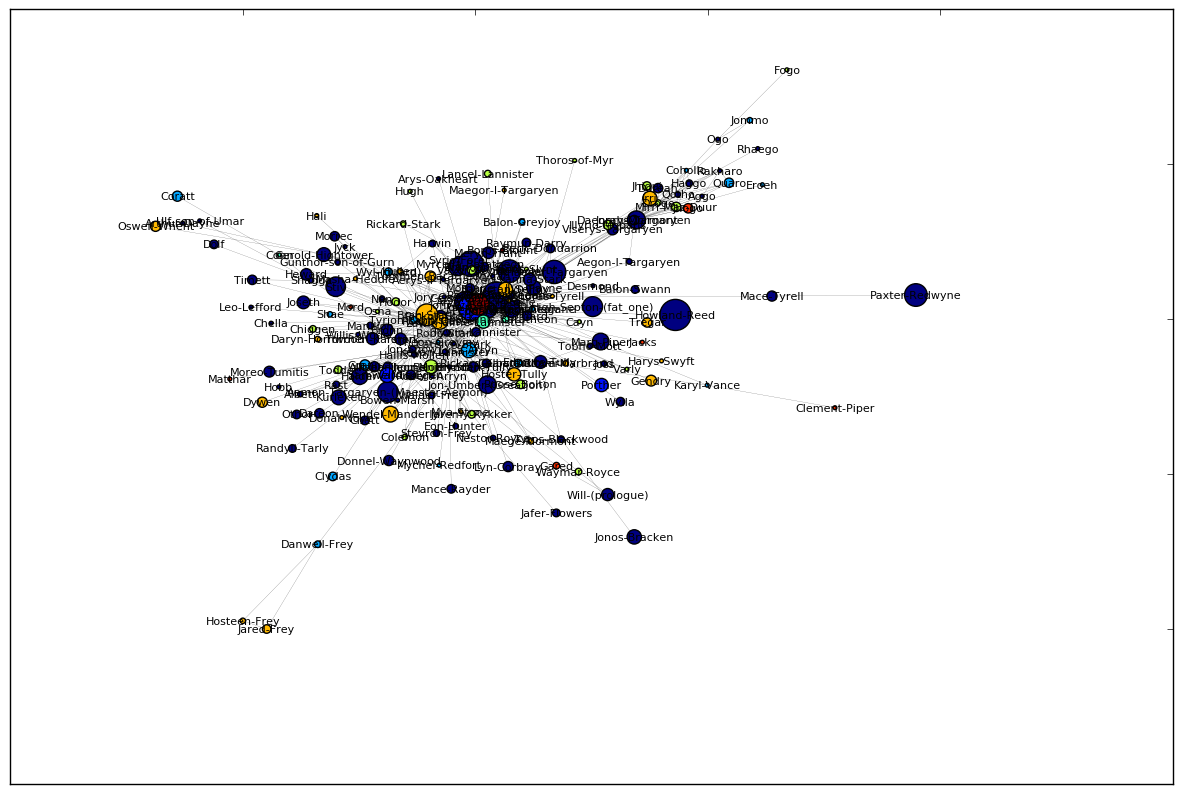

In [259]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G_book1, pos=nx.spring_layout(G_book1), node_color=groups,\
                 node_size=centrality_norm, label=True,font_size=8 ,width=0.1)
plt.show()\

In [260]:
#With some work it might look more appealing. But our final goal is to implement it as an uber cool D3.js graph

In [261]:
#Tus we need to save the graph as a json. Luckily networkx has a method for that

In [262]:
data = nx.node_link_data(G_book1)

In [269]:
s1 = json.dumps(data)

In [271]:
with open('book1.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)